In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, _ in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, _ in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

In [4]:
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [5]:
def select_data(features_list):
    data = featureFormat(data_dict, features_list )
    poi, finance_features = targetFeatureSplit( data )
    return poi, finance_features

In [6]:
def draw_scatter_plot():
    if len(features_list) == 3:
        for f1, f2 in finance_features:
            plt.scatter( f1, f2 )
        plt.show()
    elif len(features_list) == 4:
        for f1, f2, _ in finance_features:
            plt.scatter( f1, f2 )
        plt.show()

In [7]:
from sklearn.cluster import KMeans

def create_preds(n_clusters):
    km = KMeans(n_clusters=n_clusters)
    pred = km.fit_predict(finance_features)
    return pred

In [8]:
def draw_clusters(name):
    ### rename the "name" parameter when you change the number of features
    ### so that the figure gets saved to a different file

    try:
        Draw(pred, finance_features, poi, mark_poi=False, name=name, f1_name=feature_1, f2_name=feature_2)
    except NameError:
        print "no predictions object named pred found, no clusters to plot"

## For 2 Features

In [9]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"

In [10]:
features_list = [poi, feature_1, feature_2]
poi, finance_features = select_data(features_list)

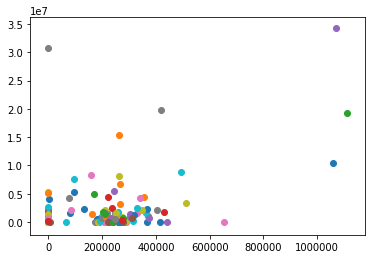

In [11]:
draw_scatter_plot()

In [12]:
pred = create_preds(2)

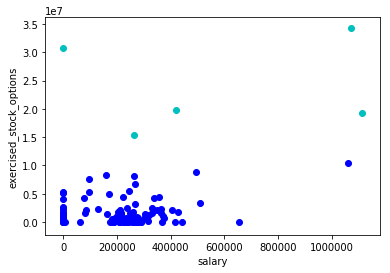

In [13]:
draw_clusters('2clusters.pdf')

## For 3 Features

In [14]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"

In [15]:
features_list = [poi, feature_1, feature_2, feature_3]
poi, finance_features = select_data([poi, feature_1, feature_2, feature_3])

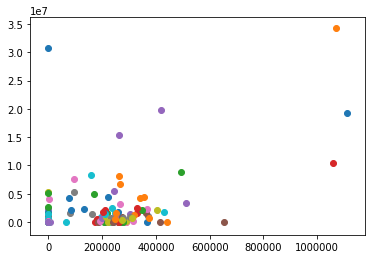

In [16]:
draw_scatter_plot()

In [17]:
pred = create_preds(3)

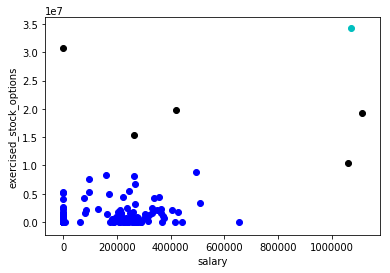

In [18]:
draw_clusters('3clusters.pdf')

### Q. In the scatterplot that pops up, are the clusters what you expected?
#### A. More or less

### Q. Do any points switch clusters? How many?
#### A. 4

### What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

In [19]:
exercised_stock_options = []
for k,v in data_dict.items():
    if data_dict[k]['exercised_stock_options'] != 'NaN':
        exercised_stock_options.append(int(data_dict[k]['exercised_stock_options']))

In [20]:
max(numpy.array(exercised_stock_options))

34348384

In [21]:
min(numpy.array(exercised_stock_options))

3285

### What are the maximum and minimum values taken by “salary”?

In [22]:
salary = []
for k,v in data_dict.items():
    if data_dict[k]['salary'] != 'NaN':
        salary.append(int(data_dict[k]['salary']))

In [23]:
max(numpy.array(salary))

1111258

In [24]:
min(numpy.array(salary))

477

### For 2 features with scaling

In [25]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
poi, finance_features = select_data(features_list)

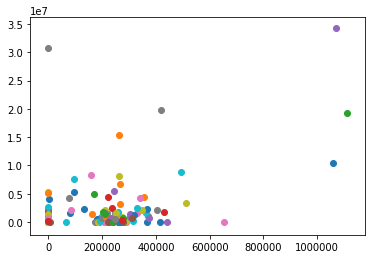

In [26]:
draw_scatter_plot()

In [27]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(finance_features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
finance_features = minmax.transform(finance_features)

In [42]:
finance_features

array([[3.29165684e-01, 0.00000000e+00],
       [2.40360024e-01, 1.94493691e-01],
       [1.53826564e-01, 1.42374791e-01],
       [0.00000000e+00, 1.89776031e-02],
       [2.18934757e-01, 1.61230322e-01],
       [2.40351925e-01, 0.00000000e+00],
       [0.00000000e+00, 1.43671679e-02],
       [3.33359130e-01, 3.21428222e-02],
       [0.00000000e+00, 1.51697646e-01],
       [1.77358453e-01, 2.56282799e-02],
       [1.17636049e-01, 6.64592547e-02],
       [2.59695768e-01, 0.00000000e+00],
       [2.23661832e-01, 2.22809026e-02],
       [2.31706768e-01, 0.00000000e+00],
       [0.00000000e+00, 6.45816409e-02],
       [0.00000000e+00, 1.08361721e-02],
       [2.59653474e-01, 0.00000000e+00],
       [2.26458662e-01, 3.07531207e-02],
       [2.59667872e-01, 5.38782261e-03],
       [5.73620167e-02, 0.00000000e+00],
       [0.00000000e+00, 2.99964330e-02],
       [3.21339419e-01, 1.26542896e-01],
       [2.44265508e-01, 2.35941231e-03],
       [0.00000000e+00, 9.56376871e-05],
       [2.736628

In [33]:
pred = create_preds(2)

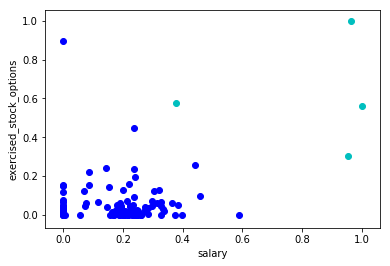

In [34]:
draw_clusters('2clusters_withScaling.pdf')

### What would be the rescaled value of a `salary` feature that had an original value of \$ 200,000 and an 
### `exercised_stock_options` feature of $1 million?

In [43]:
minmax.transform(numpy.array([[200000, 1000000]]))

array([[0.17997621, 0.02911345]])